In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [69]:
global_data_filename = '.\global_data.csv'
local_data_filename = '.\local_data.csv'

In [70]:
df_global = pd.read_csv(global_data_filename)
df_local = pd.read_csv(local_data_filename)

In [71]:
df_local.head(-10)

,year,city,country,avg_temp
0,1743,Chicago,United States,5.44
1,1744,Chicago,United States,11.73
2,1745,Chicago,United States,1.80
3,1746,Chicago,United States,NaN
4,1747,Chicago,United States,NaN
...,...,...,...,...
256,1999,Chicago,United States,11.72
257,2000,Chicago,United States,11.09
258,2001,Chicago,United States,11.70
259,2002,Chicago,United States,11.53


In [72]:
# drop irrevelent columns and nan

df_local = df_local.drop(['city', 'country'], axis=1).dropna().reset_index(drop=True)

print(df_local.avg_temp.size)

In [77]:
# remove first 3 columns to make same starting pt for local and global
df_local = df_local.drop([0, 1, 2]).reset_index(drop=True)
df_local.head(-10)

,year,avg_temp
0,1750,10.49
1,1751,11.19
2,1752,4.50
3,1753,10.04
4,1754,10.64
...,...,...
249,1999,11.72
250,2000,11.09
251,2001,11.70
252,2002,11.53


In [75]:
print(df_global.avg_temp.size)
df_global.head(-10)

266


,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
251,2001,9.41
252,2002,9.57
253,2003,9.53
254,2004,9.32


In [78]:
# remove last 2 columns to make same size as local
df_global = df_global.drop([254, 255]).reset_index(drop=True)
df_global.head(-10)

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
249,1999,9.29
250,2000,9.20
251,2001,9.41
252,2002,9.57


In [79]:
# now both are of same size and same starting pt
print(df_local.avg_temp.size)
print(df_global.avg_temp.size)

264
264


In [161]:
years = []
def calc_moving_avg(df, no_of_years):
    years.clear()
    moving_avg = [0]*(no_of_years - 1)
    base_year = 1750
    for i in range(no_of_years-1, df.avg_temp.size):
        moving_avg.append(0)
        for j in range(no_of_years):
            moving_avg[i] += df.avg_temp[i-j]
        moving_avg[i] /= float(no_of_years)
        years.append(base_year + i)
    return moving_avg

In [162]:
# lets calculate moving avg of past 14 yrs
moving_avg_local = calc_moving_avg(df_local, 14)
moving_avg_global = calc_moving_avg(df_global, 14)

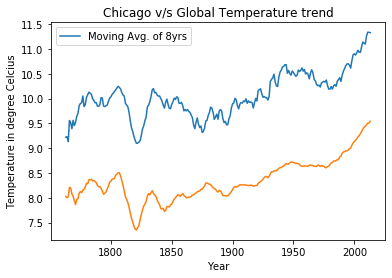

In [175]:
plt.title("Chicago v/s Global Temperature trend")
plt.ylabel("Temperature in degree Celcius")
plt.xlabel("Year")
plt.plot(years ,moving_avg_local[13:])
plt.plot(years, moving_avg_global[13:])
plt.legend(['Moving Avg. of 8yrs'])
plt.show()